In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
% matplotlib inline
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:

#import data
heart = pd.read_csv("Heart.csv")

# Data Preparation

In [104]:
heart.head(7)

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes


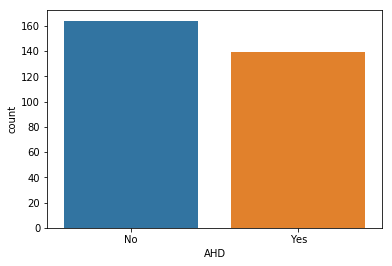

In [105]:
sns.countplot(x="AHD", data=heart)

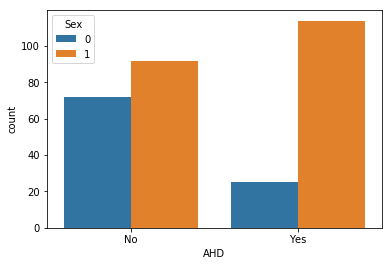

In [106]:
sns.countplot(x="AHD", hue="Sex", data= heart)

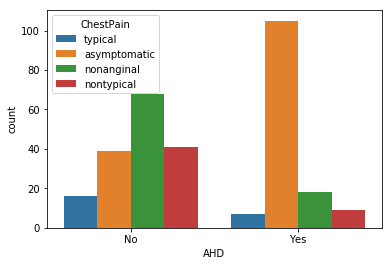

In [7]:
sns.countplot(x="AHD", hue="ChestPain", data=heart)

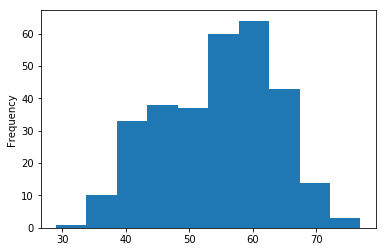

In [8]:
heart["Age"].plot.hist()

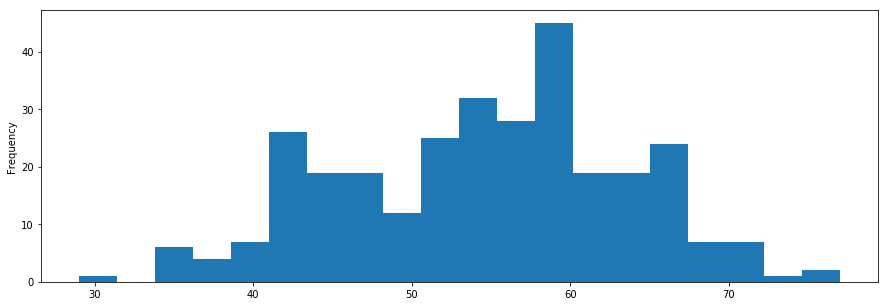

In [107]:
heart["Age"].plot.hist(bins=20, figsize=(15,5))

In [108]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Patient_Id    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [109]:
heart.isnull().sum()

Patient_Id    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

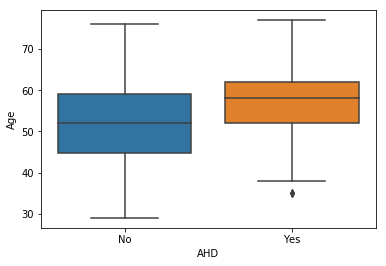

In [12]:
sns.boxplot(x="AHD", y="Age", data=heart)

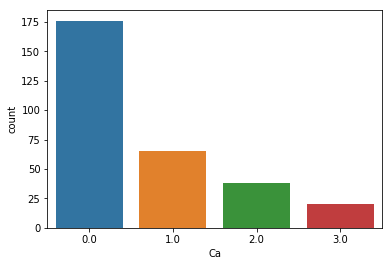

In [13]:
sns.countplot(x="Ca", data=heart)

In [14]:
heart2 = heart.dropna()

In [16]:
heart2.isnull().sum()

Patient_Id    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

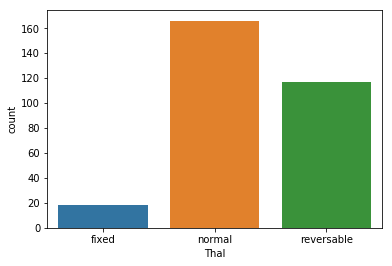

In [17]:
sns.countplot(x="Thal", data=heart)

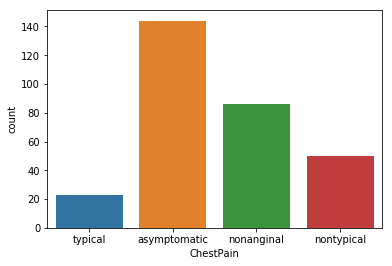

In [18]:
sns.countplot(x="ChestPain", data=heart)

In [19]:
pd.get_dummies(heart['ChestPain'])

,asymptomatic,nonanginal,nontypical,typical
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [20]:
ChestPain_mv = pd.get_dummies(heart['ChestPain'], prefix="ChestPain", prefix_sep ='_')

In [21]:
heart.head(5)

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [22]:
Thal_mv = pd.get_dummies(heart['Thal'], prefix="Thal", prefix_sep ='_')

In [40]:
heart_mv = pd.concat([heart, ChestPain_mv, Thal_mv], axis=1)

In [41]:
heart_mv.head(7)

,Patient_Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,Ca,Thal,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,typical,145,233,1,2,150,0,...,0.0,fixed,No,0,0,0,1,1,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,...,3.0,normal,Yes,1,0,0,0,0,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,...,2.0,reversable,Yes,1,0,0,0,0,0,1
3,4,37,1,nonanginal,130,250,0,0,187,0,...,0.0,normal,No,0,1,0,0,0,1,0
4,5,41,0,nontypical,130,204,0,2,172,0,...,0.0,normal,No,0,0,1,0,0,1,0
5,6,56,1,nontypical,120,236,0,0,178,0,...,0.0,normal,No,0,0,1,0,0,1,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,...,2.0,normal,Yes,1,0,0,0,0,1,0


In [42]:
heart_mv.drop(['ChestPain', 'Thal'],axis=1,inplace=True)

In [43]:
heart_mv.head(7)

,Patient_Id,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,1,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,1,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,0,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,0,1,0,0,1,0
5,6,56,1,120,236,0,0,178,0,0.8,1,0.0,No,0,0,1,0,0,1,0
6,7,62,0,140,268,0,2,160,0,3.6,3,2.0,Yes,1,0,0,0,0,1,0


In [44]:
AHD_dv = heart['AHD']

In [45]:
AHD_dv.head(7)

0     No
1    Yes
2    Yes
3     No
4     No
5     No
6    Yes
Name: AHD, dtype: object

In [29]:
#heart_mv = pd.concat([heart_mv, AHD_dv], axis=1)

In [46]:
heart_mv.head(7)

,Patient_Id,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,1,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,1,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,0,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,0,1,0,0,1,0
5,6,56,1,120,236,0,0,178,0,0.8,1,0.0,No,0,0,1,0,0,1,0
6,7,62,0,140,268,0,2,160,0,3.6,3,2.0,Yes,1,0,0,0,0,1,0


In [47]:
#heart_mv.drop(['Patient_Id', 'AHD'],axis=1,inplace=True)
heart_mv.drop(['Patient_Id'],axis=1,inplace=True)

In [48]:
heart_mv.isnull().sum()

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        4
AHD                       0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
dtype: int64

In [61]:
heart_mv2 = heart_mv.dropna()

In [62]:
heart_mv2.isnull().sum()

Age                       0
Sex                       0
RestBP                    0
Chol                      0
Fbs                       0
RestECG                   0
MaxHR                     0
ExAng                     0
Oldpeak                   0
Slope                     0
Ca                        0
AHD                       0
ChestPain_asymptomatic    0
ChestPain_nonanginal      0
ChestPain_nontypical      0
ChestPain_typical         0
Thal_fixed                0
Thal_normal               0
Thal_reversable           0
dtype: int64

C:\Users\zazem\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\zazem\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\zazem\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


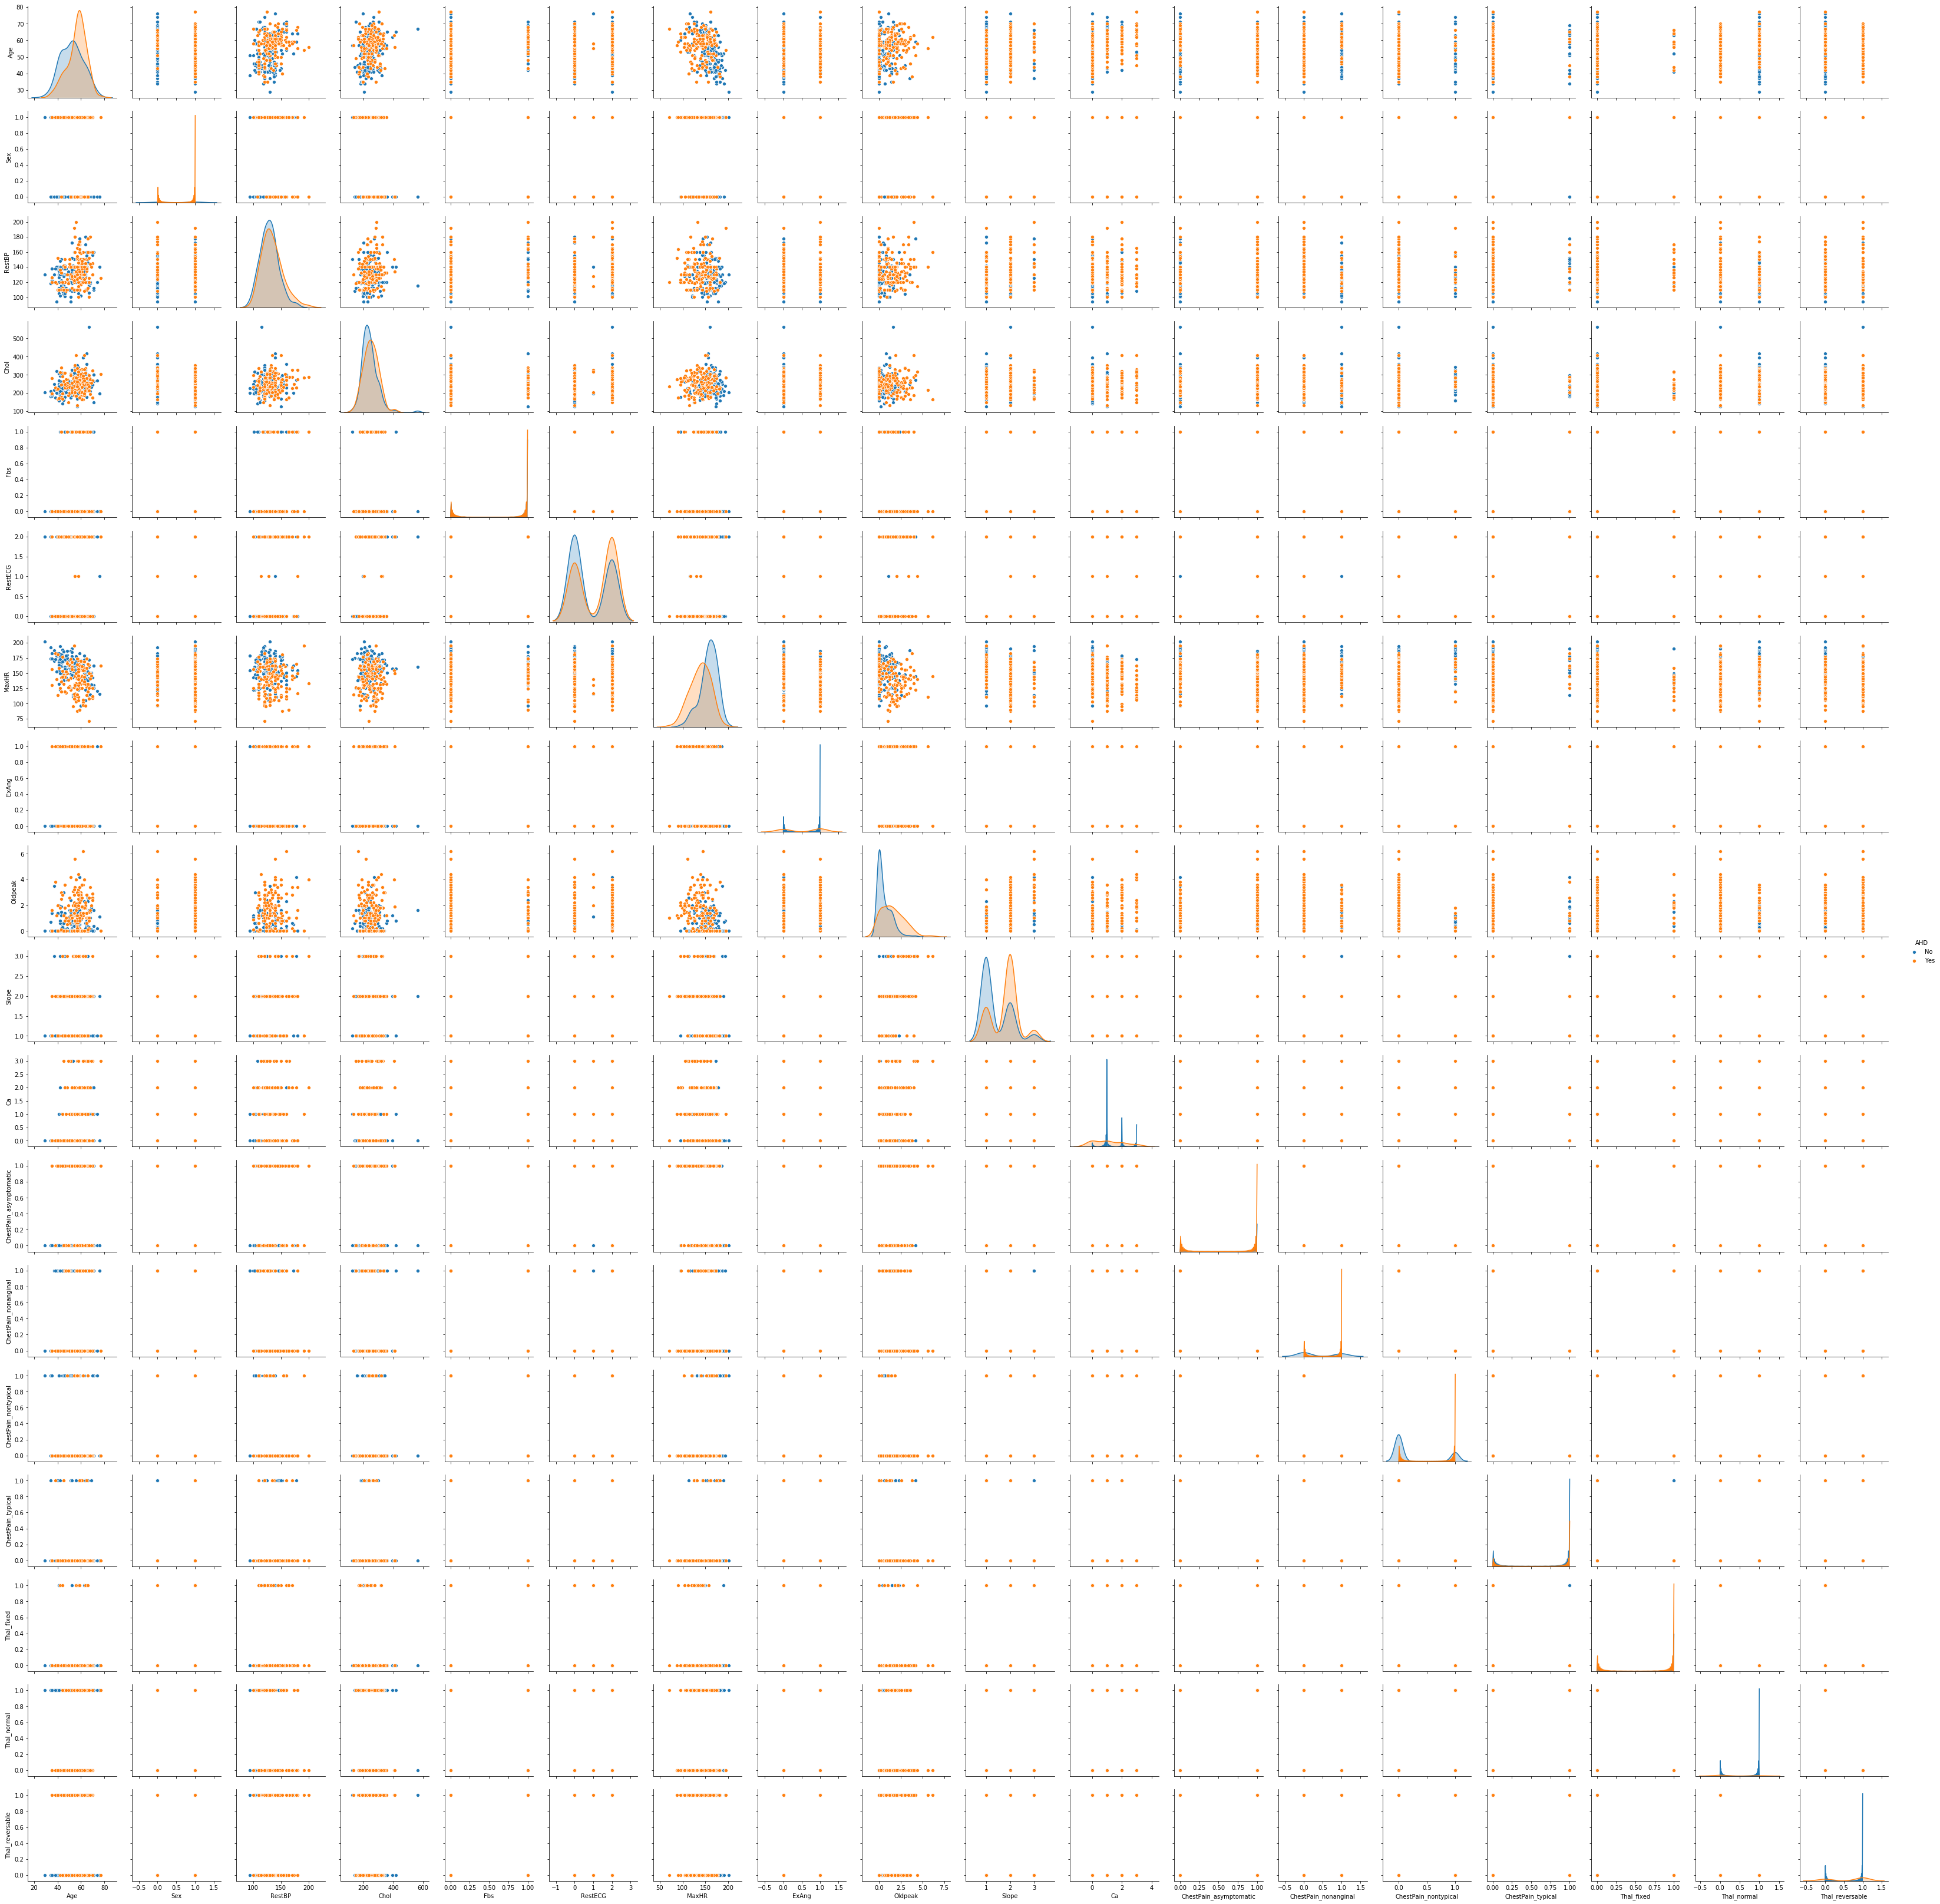

In [51]:
sns.pairplot(heart_mv, hue='AHD')

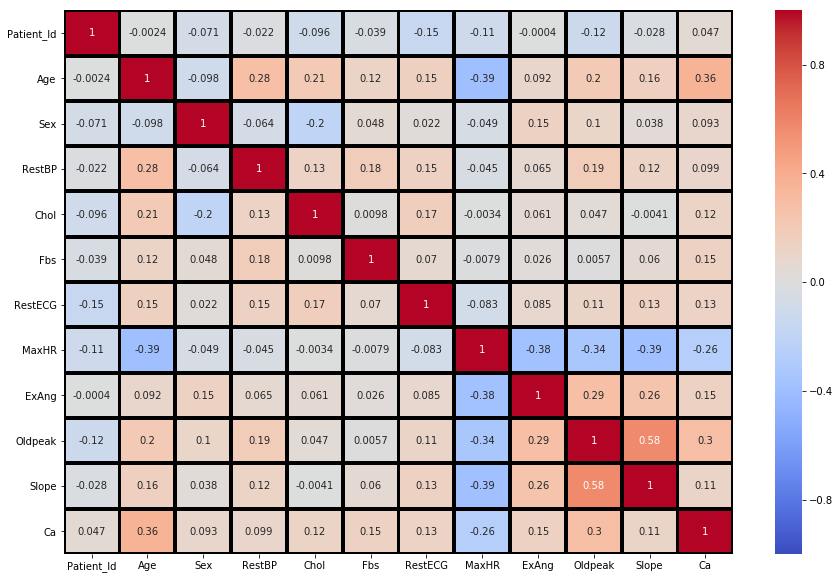

In [52]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(heart.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',ax=ax)

# Partition Dataset into: Training & Validation Subsets.

In [63]:
X = heart_mv2.drop("AHD", axis=1)
Y = heart_mv2["AHD"]

In [64]:
X.head(5)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


In [65]:
Y.head(5)

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

In [66]:
X_tr, X_val, Y_tr, Y_val = train_test_split(X,Y, test_size=.23, random_state=77)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
# create an instance of your object.... ie an instance of a logistic regression model.
model_LogReg = LogisticRegression()

In [69]:
model_LogReg.fit(X_tr, Y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The output above outlines the various parameters or dials available to you to modify how the model is built.  Experiment with different settings to generate different models using the same data and the same algorithm.

In [70]:
model_LogReg_predict = model_LogReg.predict(X_val)

Evaluate the quality of predictions using the classification report function.

In [71]:
from sklearn.metrics import classification_report

In [113]:
classification_report(Y_val, model_LogReg_predict)


'             precision    recall  f1-score   support\n\n         No       0.83      0.89      0.86        38\n        Yes       0.86      0.77      0.81        31\n\navg / total       0.84      0.84      0.84        69\n'

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(Y_val, model_LogReg_predict)

array([[34,  4],
       [ 7, 24]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(Y_val, model_LogReg_predict)*100

84.05797101449275

Consider transforming some variables if warranted to produce new models.

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()
X_tr2 = sc.fit_transform(X_tr)
X_val2 = sc.fit_transform(X_val)

In [79]:
model_LogReg2 = LogisticRegression()
model_LogReg2.fit(X_tr2, Y_tr)
model_LogReg2_predict = model_LogReg2.predict(X_val2)
accuracy_score(Y_val, model_LogReg2_predict)*100

84.05797101449275

Notice that the overall accuracy of model_LogReg and model_LogReg2 is identical.  That means in this scenario transforming the data had no impact on model performance.  That makes sense because the variables used as inputs for model_LogReg didn't have drastically different ranges.

In [81]:
confusion_matrix(Y_val, model_LogReg_predict)

array([[34,  4],
       [ 7, 24]], dtype=int64)

# Decision Tree

In [82]:
# Import Decision-Tree related libraries 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve




In [83]:
model_dt1 = DecisionTreeClassifier(criterion='entropy', random_state=100,
                                  max_depth=7, min_samples_leaf=25)

In [84]:
model_dt1.fit(X_tr, Y_tr)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [85]:
# Decision Tree parameters displayed above provide you with opportunities to experiment 
#with different model variations.

In [86]:
model_dt1_predict = model_dt1.predict(X_val)

In [87]:
model_dt1_predict

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
      dtype=object)

In [88]:
accuracy_score(Y_val, model_dt1_predict)*100

71.01449275362319

In [89]:
confusion_matrix(Y_val, model_dt1_predict)

array([[26, 12],
       [ 8, 23]], dtype=int64)

Decision Tree Visualization

In [90]:
model_dt1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\zazem\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [92]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [93]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [94]:
from sklearn.model_selection import KFold, cross_val_score

In [95]:
model_rf1 = RandomForestClassifier(n_estimators=200, random_state = 0)

In [96]:
y_tr_array = np.ravel(Y_tr)

In [97]:
model_rf1.fit(X_tr, y_tr_array)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [98]:
model_rf1_predict = model_rf1.predict(X_val)

In [99]:
classification_report(Y_val, model_rf1_predict)

'             precision    recall  f1-score   support\n\n         No       0.80      0.84      0.82        38\n        Yes       0.79      0.74      0.77        31\n\navg / total       0.80      0.80      0.80        69\n'

In [100]:
confusion_matrix(Y_val, model_rf1_predict)

array([[32,  6],
       [ 8, 23]], dtype=int64)

In [101]:
accuracy_score(Y_val, model_rf1_predict)*100

79.71014492753623